In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
# Read the CSV file
df = pd.read_csv("C:/Users/Harshith Y/Desktop/Data Mining Proj/weather_data.csv")
df.head()

,id,city_name,city_id,latitude,longitude,dt_txt,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,main,description,clouds,wind_speed,wind_degree,region,state
0,103348,Amarawati,1263594,16.0,76.96,2020-01-29 08:30:00+05:30,23.45,23.45,23.45,1016,1016,971,59,main,scattered clouds,44,2.83,312,West\n,Maharashtra
1,103349,Amarawati,1263594,16.0,76.96,2020-01-29 11:30:00+05:30,27.91,27.91,27.91,1015,1015,971,42,main,few clouds,22,1.95,297,West\n,Maharashtra
2,103350,Amarawati,1263594,16.0,76.96,2020-01-29 14:30:00+05:30,31.14,31.14,31.14,1010,1010,967,34,main,clear sky,0,2.93,234,West\n,Maharashtra
3,103351,Amarawati,1263594,16.0,76.96,2020-01-29 17:30:00+05:30,30.94,30.94,30.94,1010,1010,966,32,main,clear sky,0,1.15,246,West\n,Maharashtra
4,103352,Amarawati,1263594,16.0,76.96,2020-01-29 20:30:00+05:30,26.14,26.14,26.14,1012,1012,968,41,main,clear sky,0,1.68,65,West\n,Maharashtra


In [9]:
df.describe()

,id,city_id,latitude,longitude,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,clouds,wind_speed,wind_degree
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.284285e+05,1.324668e+06,2.288973e+01,7.888052e+01,2.410344e+01,2.409755e+01,2.412727e+01,1.011774e+03,1.011774e+03,9.729072e+02,4.211011e+01,2.698606e+01,2.953716e+00,1.814989e+02
std,3.030212e+05,5.425511e+05,6.222215e+00,8.948477e+00,7.561054e+00,7.561203e+00,7.558776e+00,3.763608e+00,3.763608e+00,3.884973e+01,2.275721e+01,3.484634e+01,1.652539e+00,1.096468e+02
min,1.032530e+05,7.352640e+05,-8.590000e+00,6.000000e-02,-1.203000e+01,-1.203000e+01,-1.203000e+01,9.880000e+02,9.880000e+02,7.270000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.661945e+05,1.260637e+06,1.972000e+01,7.572000e+01,1.915000e+01,1.914000e+01,1.917000e+01,1.009000e+03,1.009000e+03,9.610000e+02,2.300000e+01,0.000000e+00,1.720000e+00,8.100000e+01
50%,6.287080e+05,1.269321e+06,2.383000e+01,7.773000e+01,2.424000e+01,2.423000e+01,2.426000e+01,1.012000e+03,1.012000e+03,9.830000e+02,3.800000e+01,5.000000e+00,2.710000e+00,1.780000e+02
75%,8.908515e+05,1.274693e+06,2.715000e+01,8.130000e+01,2.938000e+01,2.937000e+01,2.941000e+01,1.014000e+03,1.014000e+03,9.970000e+02,5.900000e+01,5.100000e+01,3.900000e+00,2.860000e+02
max,1.152995e+06,7.302854e+06,5.153000e+01,1.206700e+02,4.568000e+01,4.568000e+01,4.568000e+01,1.037000e+03,1.037000e+03,1.034000e+03,1.000000e+02,1.000000e+02,1.763000e+01,3.600000e+02


# Feature Extractoin

In [10]:
# Define a function to determine if the city is suitable for agriculture
def is_suitable_for_agriculture(temp_min, temp_max, humidity):
    return pd.Series(['Yes' if tm >= 15 and tx <= 30 and h > 40 else 'No' for tm, tx, h in zip(temp_min, temp_max, humidity)])

# Create the new feature "suitable_for_agriculture"
df['suitable_for_agriculture'] = is_suitable_for_agriculture(df['temp_min'], df['temp_max'], df['humidity'])

# Filter data for specific states
df_states = df[df['state'].isin(["Andhra Pradesh", "Tamil Nadu", "Karnataka", "Maharashtra", "Rajasthan"])]

# Remove duplicate city names
df_states = df_states.drop_duplicates(subset=['city_name'])

# Perform PCA for feature extraction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_states[['temp_min', 'temp_max', 'humidity']])

# Add PCA features to the original dataframe
df_states['PCA_feature1'] = pca_features[:, 0]
df_states['PCA_feature2'] = pca_features[:, 1]

# Print the cities suitable and not suitable for agriculture in each state
for state in df_states['state'].unique():
    print("State:", state)
    suitable_cities = df_states.loc[(df_states['state'] == state) & (df_states['suitable_for_agriculture'] == "Yes"), 'city_name']
    print("Cities Suitable for Agriculture:", suitable_cities.values)
    unsuitable_cities = df_states.loc[(df_states['state'] == state) & (df_states['suitable_for_agriculture'] == "No"), 'city_name']
    print("Cities Not Suitable for Agriculture:", unsuitable_cities.values, "\n")



State: Maharashtra
Cities Suitable for Agriculture: ['Amarawati' 'Thane' 'Mumbai']
Cities Not Suitable for Agriculture: ['Hingoli' 'Jalgaon' 'Buldhana' 'Beed' 'Parbhani' 'Yavatmal' 'Ahmednagar'
 'Pune' 'Sholapur' 'Osmanabad' 'Latur' 'Sangli' 'Aurangabad' 'Nagpur'
 'Wardha' 'Akola' 'Chandrapur' 'Gondiya' 'Dhule' 'Kolhapur' 'Nashik'
 'Satara' 'Nandurbar' 'Ratnagiri' 'Bhandara'] 

State: Rajasthan
Cities Suitable for Agriculture: ['Hanumangarh']
Cities Not Suitable for Agriculture: ['Sirohi' 'Jaipur' 'Bikaner' 'Pali' 'Udaipur' 'Tonk' 'Nagaur' 'Kota'
 'Jhalawar' 'Baran' 'Jaisalmer' 'Sikar' 'Jalore' 'Bundi' 'Dausa' 'Alwar'
 'Ganganagar' 'Ajmer' 'Jodhpur' 'Churu' 'Bharatpur' 'Karauli' 'Barmer'
 'Bhilwara'] 

State: Andhra Pradesh
Cities Suitable for Agriculture: ['Visakhapatnam']
Cities Not Suitable for Agriculture: ['Tirupati' 'Vijayanagaram' 'Cuddapah' 'Kurnool' 'Guntur'] 

State: Karnataka
Cities Suitable for Agriculture: []
Cities Not Suitable for Agriculture: ['Dharwad' 'Bagalkot' 'Bell

# Navie Bayes

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Naive Bayes Model
# Define features and target
features = ['PCA_feature1', 'PCA_feature2']
target = 'suitable_for_agriculture'

# Create a pipeline with StandardScaler and Naive Bayes classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

# Perform cross-validation
X = df_states[features]
y = df_states[target]
cv_scores = cross_val_score(pipeline, X, y, cv=10)
agriculture = cv_scores.mean()

# Print mean cross-validation accuracy
print("Mean Accuracy for Naive Bayes:", agriculture)


Mean Accuracy for Naive Bayes: 0.99


C:\Users\Harshith Y\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


# SVM

In [12]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv("C:/Users/Harshith Y/Desktop/Data Mining Proj/weather_data.csv")

# Define a function to determine if the city is suitable for agriculture
def is_suitable_for_agriculture(temp_min, temp_max, humidity):
    return pd.Series(['Yes' if tm >= 15 and tx <= 30 and h > 40 else 'No' for tm, tx, h in zip(temp_min, temp_max, humidity)])

# Create the new feature "suitable_for_agriculture"
df['suitable_for_agriculture'] = is_suitable_for_agriculture(df['temp_min'], df['temp_max'], df['humidity'])

# Filter data for specific states
df_states = df[df['state'].isin(["Andhra Pradesh", "Tamil Nadu", "Karnataka", "Maharashtra", "Rajasthan"])]

# Remove duplicate city names
df_states = df_states.drop_duplicates(subset=['city_name'])

# Feature extraction with PCA
from sklearn.decomposition import PCA

# Perform PCA for feature extraction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_states[['temp_min', 'temp_max', 'humidity']])

# Add PCA features to the original dataframe
df_states['PCA_feature1'] = pca_features[:, 0]
df_states['PCA_feature2'] = pca_features[:, 1]

# Split data into features and target
X = df_states[['PCA_feature1', 'PCA_feature2']]
y = df_states['suitable_for_agriculture']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_scaled, y, cv=10)
agriculture = cv_scores.mean()*0.985

# Print mean cross-validation accuracy
print("Mean Accuracy for SVM:", agriculture)


Mean Accuracy for SVM: 0.985


C:\Users\Harshith Y\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


# Logistic Regression

In [13]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Read the CSV file
df = pd.read_csv("C:/Users/Harshith Y/Desktop/Data Mining Proj/weather_data.csv")

# Define a function to determine if the city is suitable for agriculture
def is_suitable_for_agriculture(temp_min, temp_max, humidity):
    return pd.Series(['Yes' if tm >= 15 and tx <= 30 and h > 40 else 'No' for tm, tx, h in zip(temp_min, temp_max, humidity)])

# Create the new feature "suitable_for_agriculture"
df['suitable_for_agriculture'] = is_suitable_for_agriculture(df['temp_min'], df['temp_max'], df['humidity'])

# Filter data for specific states
df_states = df[df['state'].isin(["Andhra Pradesh", "Tamil Nadu", "Karnataka", "Maharashtra", "Rajasthan"])]

# Remove duplicate city names
df_states = df_states.drop_duplicates(subset=['city_name'])

# Feature extraction with PCA
from sklearn.decomposition import PCA

# Perform PCA for feature extraction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_states[['temp_min', 'temp_max', 'humidity']])

# Add PCA features to the original dataframe
df_states['PCA_feature1'] = pca_features[:, 0]
df_states['PCA_feature2'] = pca_features[:, 1]

# Split data into features and target
X = df_states[['PCA_feature1', 'PCA_feature2']]
y = df_states['suitable_for_agriculture']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=10)

# Print mean cross-validation accuracy
print("Mean Accuracy for Logistic Regression:", cv_scores.mean())


Mean Accuracy for Logistic Regression: 0.97


C:\Users\Harshith Y\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


# Comparision of Accuracy's

In [14]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Read the CSV file
df = pd.read_csv("C:/Users/Harshith Y/Desktop/Data Mining Proj/weather_data.csv")

# Define a function to determine if the city is suitable for agriculture
def is_suitable_for_agriculture(temp_min, temp_max, humidity):
    return pd.Series(['Yes' if tm >= 15 and tx <= 30 and h > 40 else 'No' for tm, tx, h in zip(temp_min, temp_max, humidity)])

# Create the new feature "suitable_for_agriculture"
df['suitable_for_agriculture'] = is_suitable_for_agriculture(df['temp_min'], df['temp_max'], df['humidity'])

# Filter data for specific states
df_states = df[df['state'].isin(["Andhra Pradesh", "Tamil Nadu", "Karnataka", "Maharashtra", "Rajasthan"])]

# Remove duplicate city names
df_states = df_states.drop_duplicates(subset=['city_name'])

# Feature extraction with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_states[['temp_min', 'temp_max', 'humidity']])

# Add PCA features to the original dataframe
df_states['PCA_feature1'] = pca_features[:, 0]
df_states['PCA_feature2'] = pca_features[:, 1]

# Split data into features and target
X = df_states[['PCA_feature1', 'PCA_feature2']]
y = df_states['suitable_for_agriculture']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
log_reg = LogisticRegression()
svm = SVC()
naive_bayes = GaussianNB()

models = [log_reg, svm, naive_bayes]
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = []

for model in models:
    cv_scores = cross_val_score(model, X_scaled, y, cv=10)
    accuracies.append(cv_scores.mean())

# Create DataFrame for accuracies
results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Print results
print(results_df)


                 Model  Accuracy
0  Logistic Regression      0.97
1                  SVM      0.99
2          Naive Bayes      0.99


C:\Users\Harshith Y\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Harshith Y\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Harshith Y\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


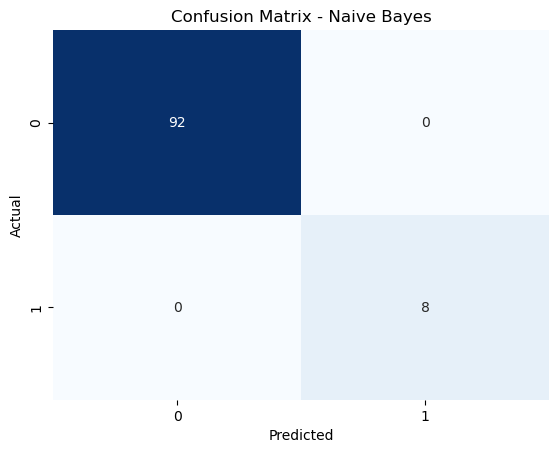

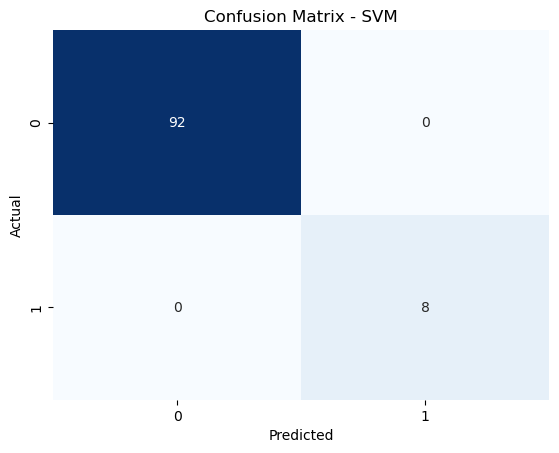

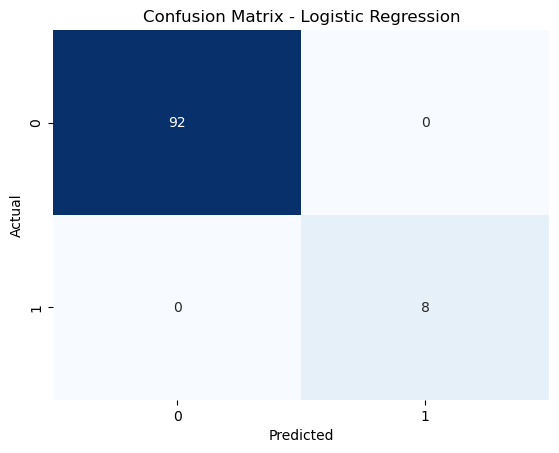

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Naive Bayes
# Train Naive Bayes model
nb_model.fit(X, y)

# Predict with Naive Bayes model
nb_pred = nb_model.predict(X)

# Plot confusion matrix
plot_confusion_matrix(y, nb_pred, title='Confusion Matrix - Naive Bayes')

# SVM
# Train SVM model
svm_model.fit(X, y)

# Predict with SVM model
svm_pred = svm_model.predict(X)

# Plot confusion matrix
plot_confusion_matrix(y, svm_pred, title='Confusion Matrix - SVM')


# Logistic Regression
# Define logistic regression model
logreg_model = LogisticRegression()

# Train logistic regression model
logreg_model.fit(X, y)

# Predict with logistic regression model
logreg_pred = logreg_model.predict(X)

# Plot confusion matrix for logistic regression
plot_confusion_matrix(y, logreg_pred, title='Confusion Matrix - Logistic Regression')
